In [3]:
from notebook_env import * 

In [20]:
who_df = pd.read_csv(os.path.join(datasets_directory, 'life_expectancy_data.csv'))
who_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [34]:
def process_who_data(data_path):
    who_df = pd.read_csv(data_path)
    col_names = {col: col.rstrip().replace(' ', '_') for col in who_df.columns}
    y = who_df['Life expectancy '].dropna(axis = 0)
    who_df = (
        who_df
        .drop(['Country', 'Year','Status', ], axis=1)
        .apply(lambda col: (col- col.min()) / (col.max() - col.min()), axis=1)
        .rename(col_names, axis=1)
        .dropna(axis=0, subset = ['Life_expectancy'])
        # .drop('Life_expectancy', axis=1)
        .fillna(0)
    )
    # print(who_df.columns)
    
    return who_df.drop(['Life_expectancy'], axis=1), y

In [35]:
who_df, y = process_who_data(os.path.join(datasets_directory, 'life_expectancy_data.csv'))

In [36]:
len(who_df)

2928

Simulations: 100%|██████████| 1000/1000 [00:14<00:00, 66.88it/s]



Confidence Interval Sizes:
Quantile: 0.70, Interval Size: 6.0977, Lower Bound: 74.3615, Upper Bound: 80.4593
Quantile: 0.80, Interval Size: 7.5398, Lower Bound: 73.6405, Upper Bound: 81.1803
Quantile: 0.90, Interval Size: 9.6773, Lower Bound: 72.5718, Upper Bound: 82.2491
Quantile: 0.95, Interval Size: 11.5312, Lower Bound: 71.6448, Upper Bound: 83.1760

Evaluating miscoverage rate for quantile: 0.7
Quantile 0.7: Within Interval = 528, Total Samples = 1000, Miscoverage Rate = 0.4720

Evaluating miscoverage rate for quantile: 0.8
Quantile 0.8: Within Interval = 627, Total Samples = 1000, Miscoverage Rate = 0.3730

Evaluating miscoverage rate for quantile: 0.9
Quantile 0.9: Within Interval = 749, Total Samples = 1000, Miscoverage Rate = 0.2510

Evaluating miscoverage rate for quantile: 0.95
Quantile 0.95: Within Interval = 837, Total Samples = 1000, Miscoverage Rate = 0.1630


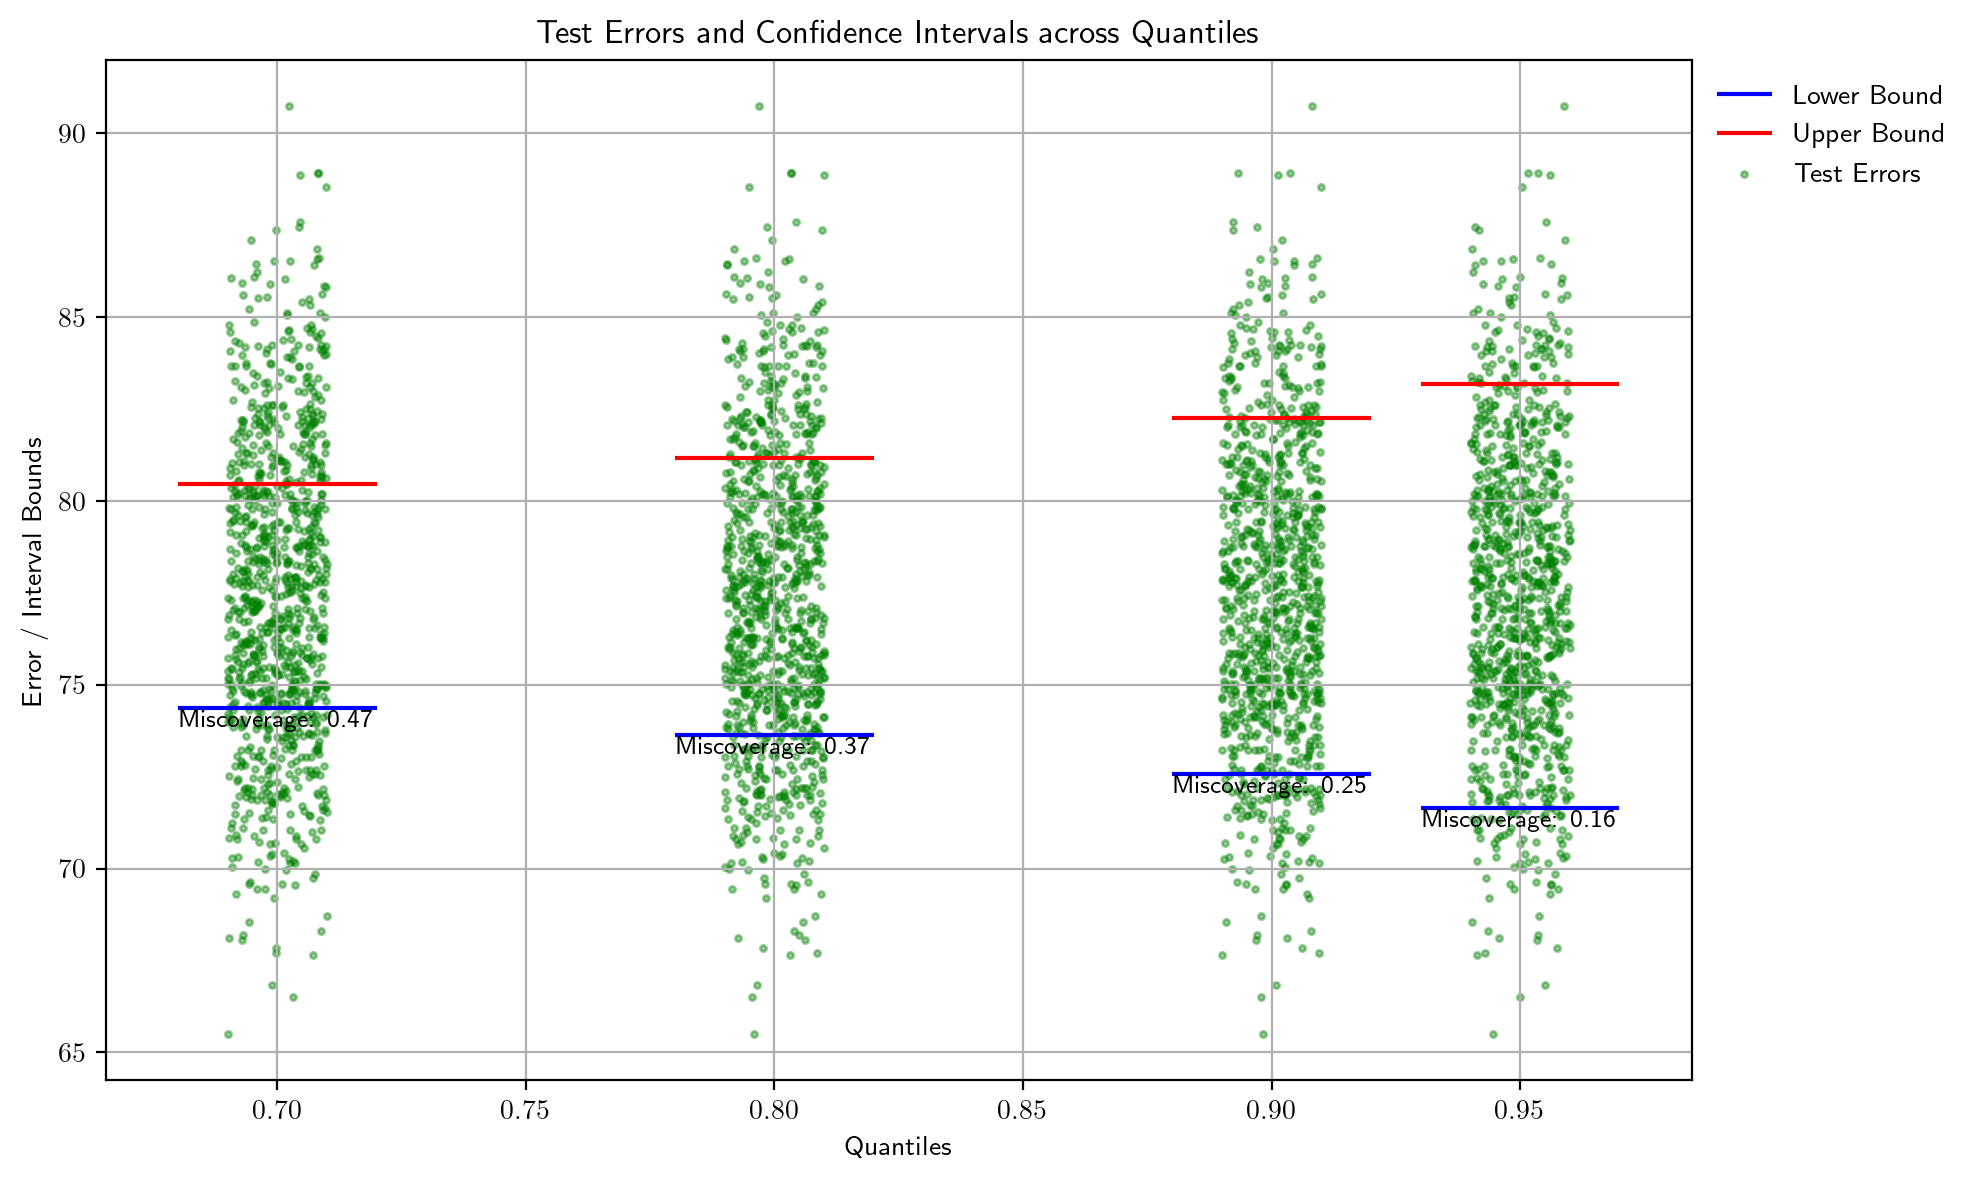

In [38]:
test = cv_intervals.CvIntervalsTest(1000, [0.7, 0.8, 0.9, 0.95], who_df, y)
test.run()
test.plot_graph()